# DESAFIO 3 ANALISIS ESTADISTICO CON PYTHON-DATA SCIENCE-DESAFIO LATAM

### Descripción
Un grupo de investigadores está interesado en analizar la relación entre el hábito de fumar
con el crecimiento de los bebés en edad gestacional. Para esto han recopilado los datos
guardados en el dataset baby.csv, que contiene los siguientes campos de datos:
- **Birth.Weight** : Peso del bebe
- **Gestational.Days**: Días de gestación
- **Maternal.Age**: Edad de la madre
- **Maternal.Height**: Altura de la madre
- **Maternal.Pregnancy.Weight**: Peso de la madre
- **Maternal.Smoker**: ¿Es la madre fumadora? (True: fumadora, False: no es fumadora)

## A partir de estos datos se solicita:

### 1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [66]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, percentileofscore


In [67]:
# Importamos los datos desde el archivo 'baby.csv' y lo almacenamos en df_baby
df_baby = pd.read_csv('baby.csv')
df_baby.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [68]:
# Describimos los datos de forma general
df_baby.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


In [69]:
# Obtenemos informacion correspondiente a los tipos de datos
df_baby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [70]:
# Verificamos si tenemos datos nulos
f_baby.isnull().sum()

Unnamed: 0                   0
Birth.Weight                 0
Gestational.Days             0
Maternal.Age                 0
Maternal.Height              0
Maternal.Pregnancy.Weight    0
Maternal.Smoker              0
dtype: int64

In [84]:
# Verificamos si tenemos datos duplicados
df_baby.duplicated().sum()


0

In [86]:
# No existen datos nulos, pero si existieran podemos eliminarlos
df_baby.dropna(inplace=True)

In [87]:
# No existen datos duplicados, pero si existieran podriamos eliminarlos
df_baby.drop_duplicates(inplace=True)

### 2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución
### normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

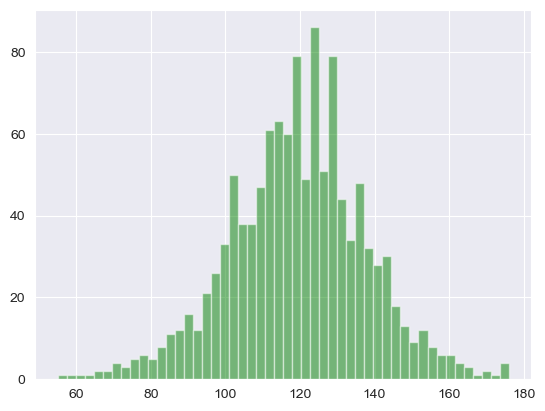

In [71]:
# Definimos una variable llamada pesos
pesos = df_baby['Birth.Weight']

# Calcula la media (promedio) de los pesos
mu= pesos.mean()

# Calcula la desviación estándar de los pesos
sigma=pesos.std()

# Encuentra el valor mínimo en los pesos
minimo=pesos.min()

# Encuentra el valor máximo en los pesos
maximo=pesos.max()

# Genera una serie de valores equidistantes entre el mínimo y el máximo
x = np.linspace(minimo, maximo)

# Calcula la función de densidad de probabilidad (PDF) de la distribución normal
# usando la media (loc=mu) y la desviación estándar (scale=sigma) calculadas anteriormente
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Genera un histograma de los datos de pesos
# bins=50: número de barras (intervalos) en el histograma
# alpha=0.5: transparencia de las barras
# color='g': color de las barras (verde)
# density=False: el histograma muestra conteos en lugar de densidades
counts, bins, _ = plt.hist(pesos, bins=50, alpha=0.5, color='g', density=False)

# Calcula el ancho de cada bin (intervalo) en el histograma
bin_width = bins[1] - bins[0]

# Escala la PDF calculada para que se ajuste al histograma
# Multiplica la PDF por el número total de datos y el ancho de los bins
pdf_scaled = pdf * len(pesos) * bin_width

/Users/cesarjara/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


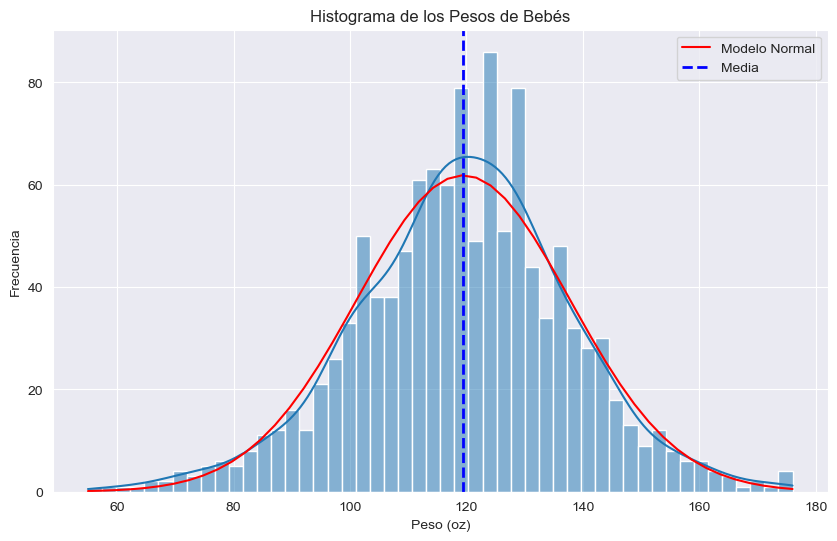

In [72]:
# 1. Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_baby, x=pesos, kde=True, bins=50)
plt.plot(x, pdf_scaled, 'r', label='Modelo Normal')
plt.axvline(x=mu, color='blue', linestyle='--', linewidth=2, label='Media')
plt.title('Histograma de los Pesos de Bebés')
plt.xlabel('Peso (oz)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### - En base a lo que se puede observar, y aun teniendo en cuenta que existen valores que no se ajustan mucho al modelo, los valores se ajustan a una distribucion Normal

### 3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5
### valores diferentes. Compara con los datos reales.

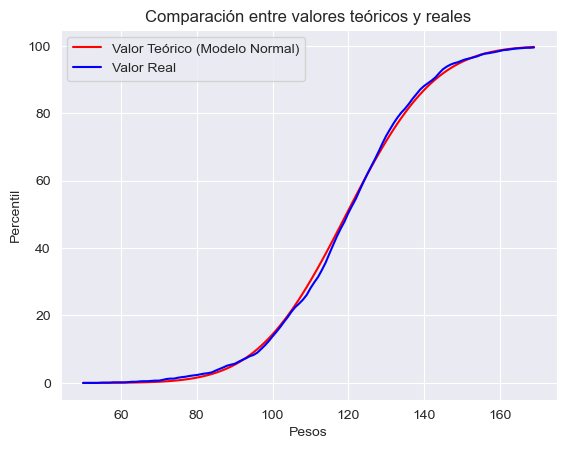

In [104]:
# Genera una lista de valores de prueba (pesos) desde 50 hasta 169
test_pesos = list(range(50, 170))

## Listas para almacenar los valores de peso, percentil teórico (p_modelo) y percentil real (p_real)
pesos_teoricos = []  # Para almacenar los valores de peso usados en el modelo teórico
pesos_reales = []    # Para almacenar los valores de peso reales
p_modelo_list = []   # Para almacenar los percentiles calculados con el modelo teórico (distribución normal)
p_real_list = []     # Para almacenar los percentiles reales basados en los datos observados

# Bucle para calcular los percentiles teóricos y reales para cada peso en test_pesos
for peso in test_pesos:
    # Calcula el percentil teórico utilizando la función de distribución acumulativa (CDF) de la distribución normal
    # loc=mu y scale=sigma son la media y desviación estándar calculadas previamente
    p_modelo = norm.cdf(peso, loc=mu, scale=sigma) * 100
    
    # Calcula el percentil real de los datos observados utilizando la función percentileofscore
    p_real = percentileofscore(pesos, peso)
    
    # Agrega el peso actual a las listas de pesos teóricos y reales
    pesos_teoricos.append(peso)
    pesos_reales.append(peso)
    
    # Agrega los percentiles calculados a sus respectivas listas
    p_modelo_list.append(p_modelo)
    p_real_list.append(p_real)

# Graficar la línea del percentil teórico calculado con el modelo de distribución normal
plt.plot(pesos_teoricos, p_modelo_list, 'r-', label='Valor Teórico (Modelo Normal)')

# Graficar la línea del percentil real calculado a partir de los datos observados
plt.plot(pesos_reales, p_real_list, 'b-', label='Valor Real')

# Etiqueta para el eje x (Pesos)
plt.xlabel('Pesos')

# Etiqueta para el eje y (Percentil)
plt.ylabel('Percentil')

# Título del gráfico
plt.title('Comparación entre valores teóricos y reales')

# Añadir una leyenda para identificar las líneas
plt.legend()

# Añadir una cuadrícula al gráfico para facilitar la lectura
plt.grid(True)

# Mostrar el gráfico resultante
plt.show()

In [105]:
# Lista de pesos específicos para los que deseas calcular los percentiles
pesos_especificos = [80, 100, 120, 140, 160]

# Iterar sobre cada peso en la lista
for peso in pesos_especificos:
    # Calcula el percentil teórico usando la distribución normal
    p_teorico = norm.cdf(peso, loc=mu, scale=sigma) * 100
    
    # Calcula el percentil real basado en los datos observados
    p_real = percentileofscore(pesos, peso)
    
    # Genera la cadena de texto con los resultados
    cadena_resultado = f"El percentil real para {peso} es {p_real:.2f} y el teórico es de {p_teorico:.2f}"
    
    # Imprime la cadena de texto
    print(cadena_resultado)

El percentil real para 80 es 2.34 y el teórico es de 1.57
El percentil real para 100 es 13.80 y el teórico es de 14.41
El percentil real para 120 es 50.38 y el teórico es de 51.17
El percentil real para 140 es 88.07 y el teórico es de 86.88
El percentil real para 160 es 98.47 y el teórico es de 98.65


### Conclusión:
El gráfico sugiere que la distribución de los pesos observados en tus datos sigue bastante bien una distribución normal, ya que los percentiles calculados a partir de la distribución normal teórica se alinean de cerca con los percentiles reales de los datos observados. Esto podría ser un indicador de que la distribución normal es un buen modelo para estos datos de pesos, al menos en el rango mostrado.

### 4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué
### diferencias existen? Explica y construye los modelos correspondientes.

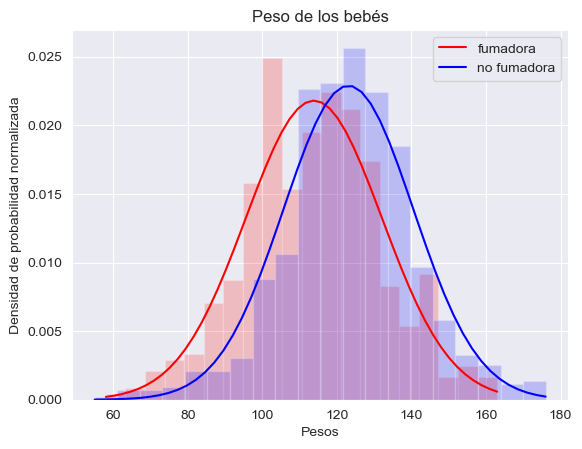

/Users/cesarjara/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: Birth.Weight, dtype: float64

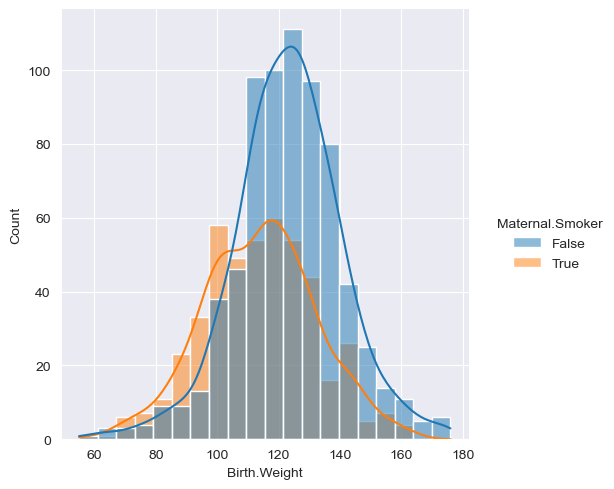

In [107]:
# Seleccionamos los datos
fumadora = df_baby[df_baby['Maternal.Smoker'] == True]['Birth.Weight']
nofumadora = df_baby[df_baby['Maternal.Smoker'] == False]['Birth.Weight']

# Construimos una función que genere los modelos
def get_psd(x):
    mu = x.mean()
    sigma = x.std()
    minimo = x.min()
    maximo = x.max()
    x = np.linspace(minimo, maximo)
    pdf = norm.pdf(x, loc=mu, scale=sigma)
    return (x, pdf)

# Plot para fumadoras
x, pdf = get_psd(fumadora)
plt.plot(x, pdf, color='red', label='fumadora')
x, pdf = get_psd(nofumadora)
plt.plot(x, pdf, color='blue', label='no fumadora')

# Histograma y KDE para fumadoras y no fumadoras
plt.hist(fumadora, bins=20, density=True, alpha=0.2, color='red')
plt.hist(nofumadora, bins=20, density=True, alpha=0.2, color='blue')
plt.xlabel('Pesos')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Peso de los bebés')
plt.legend()
plt.show()

# Usando seaborn para KDE
sns.displot(df_baby, x='Birth.Weight', bins=20, kde=True, hue='Maternal.Smoker')


### En base a lo que se puede observar, los bebes de mamas no fumadoras muestra mayores pesos y una media mayor

### 5. Considerando los datos dados:
- Calcula la probabilidad de que una madre escogida al azar fume.
- A partir del valor anterior, construye un modelo de distribución binomial que
modele el experimento correspondiente a escoger 5 madres al azar y observar
cuántas fuman.
- Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias
muestrales.
- Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula
sus respectivas medias muestrales.

Utilizando lo anterior:
- Compara gráficamente los resultados obtenidos anteriormente.
- Verifica el teorema del límite central, considerando las muestras de datos reales y
las simuladas con el modelo binomial.
- Construye un modelo de distribución normal derivado del modelo binomial, y
grafícalo junto a los anteriores para comparar. Concluye.

In [78]:
# Calculamos la probabilidad de que una madre seleccionada al azar fume.
madres_fuman = (df_baby['Maternal.Smoker'] == True).sum()
madres_total = df_baby['Maternal.Smoker'].count()
p_madre_fuma = madres_fuman / madres_total * 100
print(f'La probabilidad de que una Madre fume es de {p_madre_fuma.round(2)}%')


La probabilidad de que una Madre fume es de 39.1%


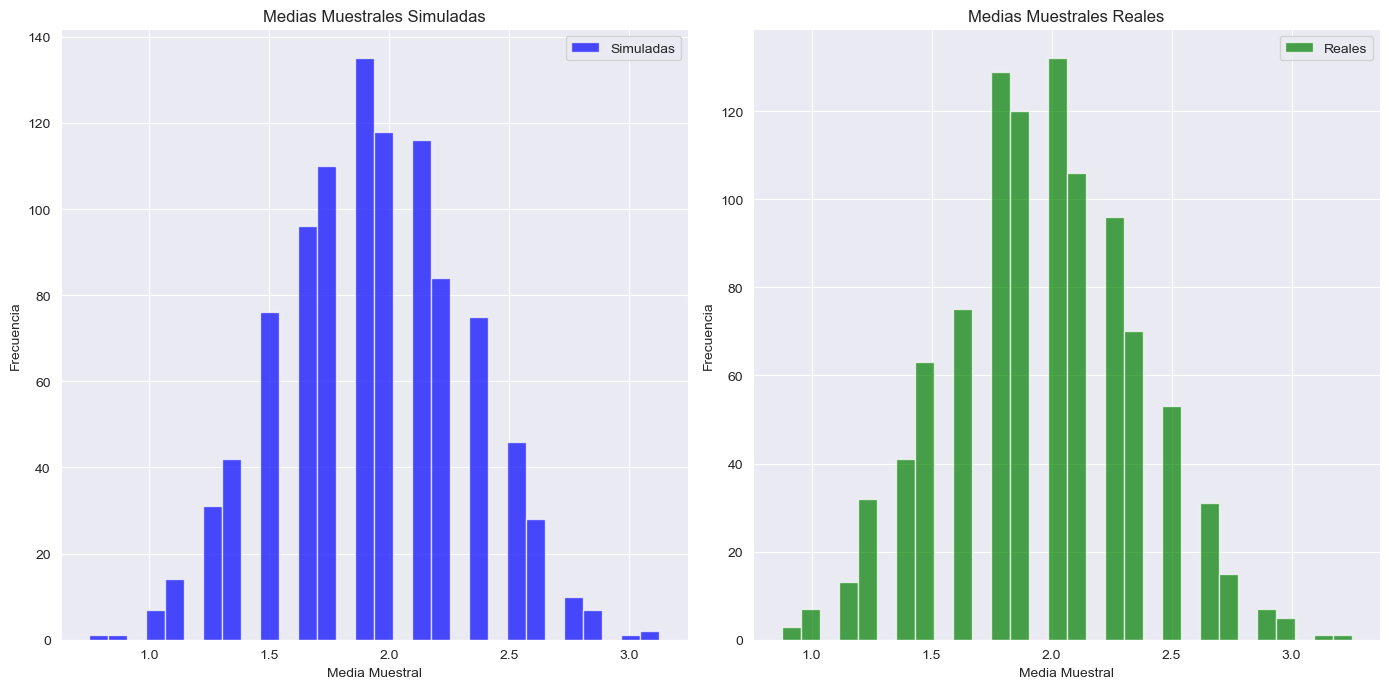

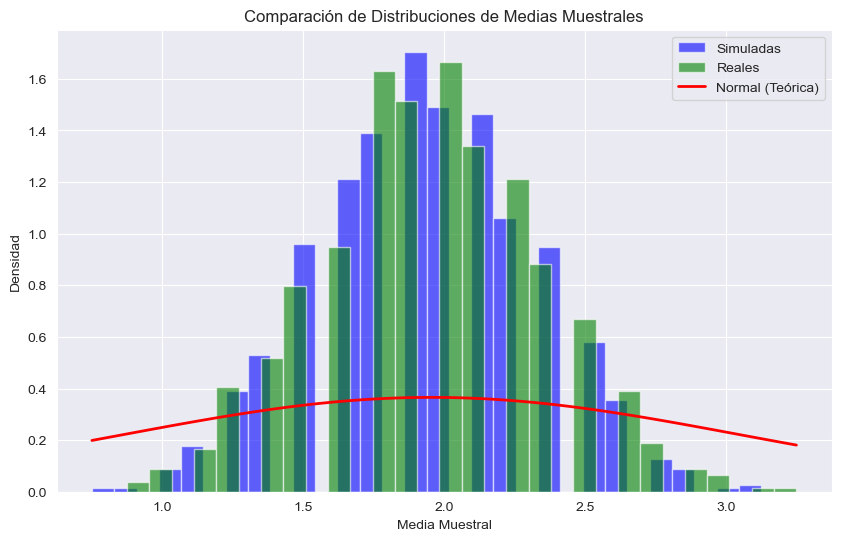

In [79]:
# Parámetros de la distribución binomial
n = 5  # Número de madres seleccionadas al azar
p = (p_madre_fuma / 100)  # Probabilidad de que una madre fume

# Paso 2: Simulación de muestras de la distribución binomial
np.random.seed(42)  # Para reproducibilidad
binomial_samples = np.random.binomial(n=n, p=p, size=(1000, 8))

# Calculamos las medias muestrales de las 1000 muestras
sample_means_simulated = np.mean(binomial_samples, axis=1)

# Paso 3: Generación de datos reales y extracción de muestras
real_data = np.random.binomial(n=n, p=p, size=10000)  # Generamos un conjunto grande de datos reales
real_samples = np.random.choice(real_data, size=(1000, 8), replace=True)  # Extraemos 1000 muestras
sample_means_real = np.mean(real_samples, axis=1)

# Paso 4: Comparación gráfica
plt.figure(figsize=(14, 7))

# Histograma de las medias muestrales simuladas
plt.subplot(1, 2, 1)
plt.hist(sample_means_simulated, bins=30, color='blue', alpha=0.7, label='Simuladas')
plt.title('Medias Muestrales Simuladas')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma de las medias muestrales de datos reales
plt.subplot(1, 2, 2)
plt.hist(sample_means_real, bins=30, color='green', alpha=0.7, label='Reales')
plt.title('Medias Muestrales Reales')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 5: Modelo de distribución normal derivado del modelo binomial
mean_binomial = n * p  # Media de la distribución binomial
var_binomial = n * p * (1 - p)  # Varianza de la distribución binomial
std_binomial = np.sqrt(var_binomial)  # Desviación estándar de la distribución binomial

# Distribución normal derivada
x = np.linspace(min(sample_means_simulated.min(), sample_means_real.min()), 
                max(sample_means_simulated.max(), sample_means_real.max()), 100)
normal_dist = stats.norm.pdf(x, mean_binomial, std_binomial)

# Graficamos las distribuciones de las medias muestrales y la distribución normal
plt.figure(figsize=(10, 6))
plt.hist(sample_means_simulated, bins=30, density=True, alpha=0.6, color='blue', label='Simuladas')
plt.hist(sample_means_real, bins=30, density=True, alpha=0.6, color='green', label='Reales')
plt.plot(x, normal_dist, 'r-', lw=2, label='Normal (Teórica)')
plt.title('Comparación de Distribuciones de Medias Muestrales')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Conclusión:
- Las gráficas y la distribución normal ajustada demuestran el Teorema del Límite Central. Aunque los datos originales siguen una distribución binomial, las medias muestrales se distribuyen de manera aproximadamente normal cuando se toman muestras suficientemente grandes, tanto en los datos simulados como en los generados directamente.
- Esta propiedad es fundamental en la inferencia estadística, ya que permite usar métodos basados en la normalidad para inferir sobre medias poblacionales incluso cuando los datos subyacentes no son normales.